# Phase 3: Data Transformation Pipeline
## Rwanda Polytechnic Multi-Campus Data Preprocessing

**Objective:** Transform cleaned datasets through:
1. Scaling/Standardization (continuous features)
2. Encoding (categorical variables)
3. Binning (creating categorical ranges)

**Input:** Cleaned datasets from Phase 2

**Output:** Transformed datasets ready for integration

---
## Setup and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("PHASE 3: DATA TRANSFORMATION PIPELINE")
print("="*60)

PHASE 3: DATA TRANSFORMATION PIPELINE


---
## Load Cleaned Data

In [2]:
# Load cleaned datasets from Phase 2
print("\nLoading cleaned datasets...")

students_df = pd.read_csv('outputs/students_cleaned.csv')
courses_df = pd.read_csv('outputs/courses_cleaned.csv')
assessments_df = pd.read_csv('outputs/assessments_cleaned.csv')

print(f"✓ Students: {len(students_df)} records")
print(f"✓ Courses: {len(courses_df)} records")
print(f"✓ Assessments: {len(assessments_df)} records")

# Display structure
print("\nStudents columns:", students_df.columns.tolist())
print("Courses columns:", courses_df.columns.tolist())
print("Assessments columns:", assessments_df.columns.tolist())


Loading cleaned datasets...
✓ Students: 589 records
✓ Courses: 75 records
✓ Assessments: 5905 records

Students columns: ['Student_ID', 'First_Name', 'Last_Name', 'Gender', 'DOB', 'Phone', 'Email', 'Program', 'Level', 'Intake_Year', 'Campus_Name', 'Campus_ID', 'Source_Campus_File', 'Upload_Date', 'Full_Name']
Courses columns: ['Course_Code', 'Course_Title', 'Credits', 'Program', 'Level', 'Semester', 'Campus_Name', 'Campus_ID', 'Source_Campus_File', 'Upload_Date']
Assessments columns: ['Student_ID', 'Course_Code', 'Assessment_Type', 'Mark', 'Assessment_Date', 'Academic_Year', 'Semester', 'Attendance_Rate', 'Campus_Name', 'Campus_ID', 'Source_Campus_File', 'Upload_Date']


In [3]:
# Display sample data
print("\nSample cleaned data:")
print("\nStudents:")
students_df.head()


Sample cleaned data:

Students:


,Student_ID,First_Name,Last_Name,Gender,DOB,Phone,Email,Program,Level,Intake_Year,Campus_Name,Campus_ID,Source_Campus_File,Upload_Date,Full_Name
0,RPH0001,Grace,Uwimana,MALE,2000-12-04,2.507993e+11,grace.uwimana@rp.ac.rw,Business Administration,1,2023,Huye,1,Huye_students.csv,2026-02-10 15:59:31.125748,Grace Uwimana
1,RPH0144,Daniel,Tuyisenge,FEMALE,2005-01-12,2.507347e+11,daniel.tuyisenge@rp.ac.rw,Business Administration,1,2025,Huye,1,Huye_students.csv,2026-02-10 15:59:31.125748,Daniel Tuyisenge
2,RPH0145,Isaac,Kubwimana,FEMALE,2001-12-02,2.507429e+11,isaac.kubwimana@rp.ac.rw,Tourism And Hospitality,4,2023,Huye,1,Huye_students.csv,2026-02-10 15:59:31.125748,Isaac Kubwimana
3,RPH0146,Diane,Uwimana,FEMALE,2001-01-15,2.507762e+11,diane.uwimana@rp.ac.rw,Civil Engineering,2,2025,Huye,1,Huye_students.csv,2026-02-10 15:59:31.125748,Diane Uwimana
4,RPH0147,Claire,Umuhoza,FEMALE,1998-12-05,2.507953e+11,claire.umuhoza@rp.ac.rw,Electrical Engineering,4,2025,Huye,1,Huye_students.csv,2026-02-10 15:59:31.125748,Claire Umuhoza


In [4]:
print("Assessments:")
assessments_df.head()

Assessments:


,Student_ID,Course_Code,Assessment_Type,Mark,Assessment_Date,Academic_Year,Semester,Attendance_Rate,Campus_Name,Campus_ID,Source_Campus_File,Upload_Date
0,RPH0001,BA103,Quiz,63.10,2025-06-16,2024/2025,2,82.1,Huye,1,Huye_assessments.csv,2026-02-10 15:59:31.138734
1,RPH0150,EE101,Quiz,57.90,2025-08-09,2023/2024,1,89.2,Huye,1,Huye_assessments.csv,2026-02-10 15:59:31.138734
2,RPH0150,EE101,Quiz,65.10,2025-08-17,2025/2026,2,95.9,Huye,1,Huye_assessments.csv,2026-02-10 15:59:31.138734
3,RPH0150,EE102,Quiz,66.85,2025-03-16,2024/2025,2,75.5,Huye,1,Huye_assessments.csv,2026-02-10 15:59:31.138734
4,RPH0150,EE102,Quiz,64.30,2025-12-10,2023/2024,1,63.0,Huye,1,Huye_assessments.csv,2026-02-10 15:59:31.138734


---
## 1. SCALING / STANDARDIZATION

### 1.1 Identify Continuous Features

In [5]:
print("="*60)
print("1. SCALING & STANDARDIZATION")
print("="*60)

# Identify continuous numeric features that need scaling
print("\nContinuous features to scale:")
print("  - Attendance_Rate (0-100 range)")
print("  - Mark (0-100 range)")
print("  - Credits (varies by course)")

# Check current statistics
print("\n--- Current Statistics (Before Scaling) ---")
if 'Attendance_Rate' in assessments_df.columns:
    print(f"\nAttendance_Rate:")
    print(assessments_df['Attendance_Rate'].describe())

print(f"\nMark:")
print(assessments_df['Mark'].describe())

print(f"\nCredits:")
print(courses_df['Credits'].describe())

1. SCALING & STANDARDIZATION

Continuous features to scale:
  - Attendance_Rate (0-100 range)
  - Mark (0-100 range)
  - Credits (varies by course)

--- Current Statistics (Before Scaling) ---

Attendance_Rate:
count    5905.000000
mean       80.286873
std        10.964253
min        60.000000
25%        71.400000
50%        80.373497
75%        89.400000
max       100.000000
Name: Attendance_Rate, dtype: float64

Mark:
count    5905.000000
mean       64.458654
std        18.065838
min         0.000000
25%        55.600000
50%        65.500000
75%        74.800000
max       100.000000
Name: Mark, dtype: float64

Credits:
count    75.000000
mean      3.653333
std       0.557342
min       3.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Credits, dtype: float64


### 1.2 Apply StandardScaler to Attendance Rate

In [6]:
print("\n--- Scaling Attendance Rate ---")

# Initialize scaler
scaler_attendance = StandardScaler()

# Scale Attendance_Rate if it exists and has non-null values
if 'Attendance_Rate' in assessments_df.columns:
    # Handle missing values before scaling
    attendance_mask = assessments_df['Attendance_Rate'].notna()
    
    if attendance_mask.sum() > 0:
        # Fit and transform on non-null values
        assessments_df.loc[attendance_mask, 'Attendance_Rate_Scaled'] = scaler_attendance.fit_transform(
            assessments_df.loc[attendance_mask, ['Attendance_Rate']]
        )
        
        print(f"✓ Scaled Attendance_Rate for {attendance_mask.sum()} records")
        print(f"\nScaled Attendance_Rate Statistics:")
        print(assessments_df['Attendance_Rate_Scaled'].describe())
        
        # Show transformation
        print("\nSample Before vs After:")
        sample_comparison = assessments_df[attendance_mask][['Attendance_Rate', 'Attendance_Rate_Scaled']].head(10)
        print(sample_comparison)
    else:
        print("⚠ No valid Attendance_Rate values to scale")
else:
    print("⚠ Attendance_Rate column not found")


--- Scaling Attendance Rate ---
✓ Scaled Attendance_Rate for 5905 records

Scaled Attendance_Rate Statistics:
count    5.905000e+03
mean     1.099807e-15
std      1.000085e+00
min     -1.850431e+00
25%     -8.106002e-01
50%      7.901242e-03
75%      8.312376e-01
max      1.798098e+00
Name: Attendance_Rate_Scaled, dtype: float64

Sample Before vs After:
   Attendance_Rate  Attendance_Rate_Scaled
0        82.100000                0.165381
1        89.200000                0.812995
2        95.900000                1.424123
3        75.500000               -0.436626
4        63.000000               -1.576791
5        82.500000                0.201866
6        66.800000               -1.230181
7        72.700000               -0.692023
8        80.037357               -0.022759
9        85.100000                0.439021


### 1.3 Apply MinMaxScaler to Marks (Optional - for ML later)

In [7]:
print("\n--- Scaling Marks (0-1 range) ---")

# MinMaxScaler scales to 0-1 range (useful for some ML algorithms)
scaler_marks = MinMaxScaler()

mark_mask = assessments_df['Mark'].notna()
if mark_mask.sum() > 0:
    assessments_df.loc[mark_mask, 'Mark_Normalized'] = scaler_marks.fit_transform(
        assessments_df.loc[mark_mask, ['Mark']]
    )
    
    print(f"✓ Normalized Mark to 0-1 range for {mark_mask.sum()} records")
    print(f"\nNormalized Mark Statistics:")
    print(assessments_df['Mark_Normalized'].describe())
    
    # Show transformation
    print("\nSample Before vs After:")
    sample_comparison = assessments_df[mark_mask][['Mark', 'Mark_Normalized']].head(10)
    print(sample_comparison)


--- Scaling Marks (0-1 range) ---
✓ Normalized Mark to 0-1 range for 5905 records

Normalized Mark Statistics:
count    5905.000000
mean        0.644587
std         0.180658
min         0.000000
25%         0.556000
50%         0.655000
75%         0.748000
max         1.000000
Name: Mark_Normalized, dtype: float64

Sample Before vs After:
     Mark  Mark_Normalized
0   63.10           0.6310
1   57.90           0.5790
2   65.10           0.6510
3   66.85           0.6685
4   64.30           0.6430
5  100.00           1.0000
6   58.10           0.5810
7   93.40           0.9340
8   84.10           0.8410
9   40.60           0.4060


### 1.4 Visualize Scaling Effects

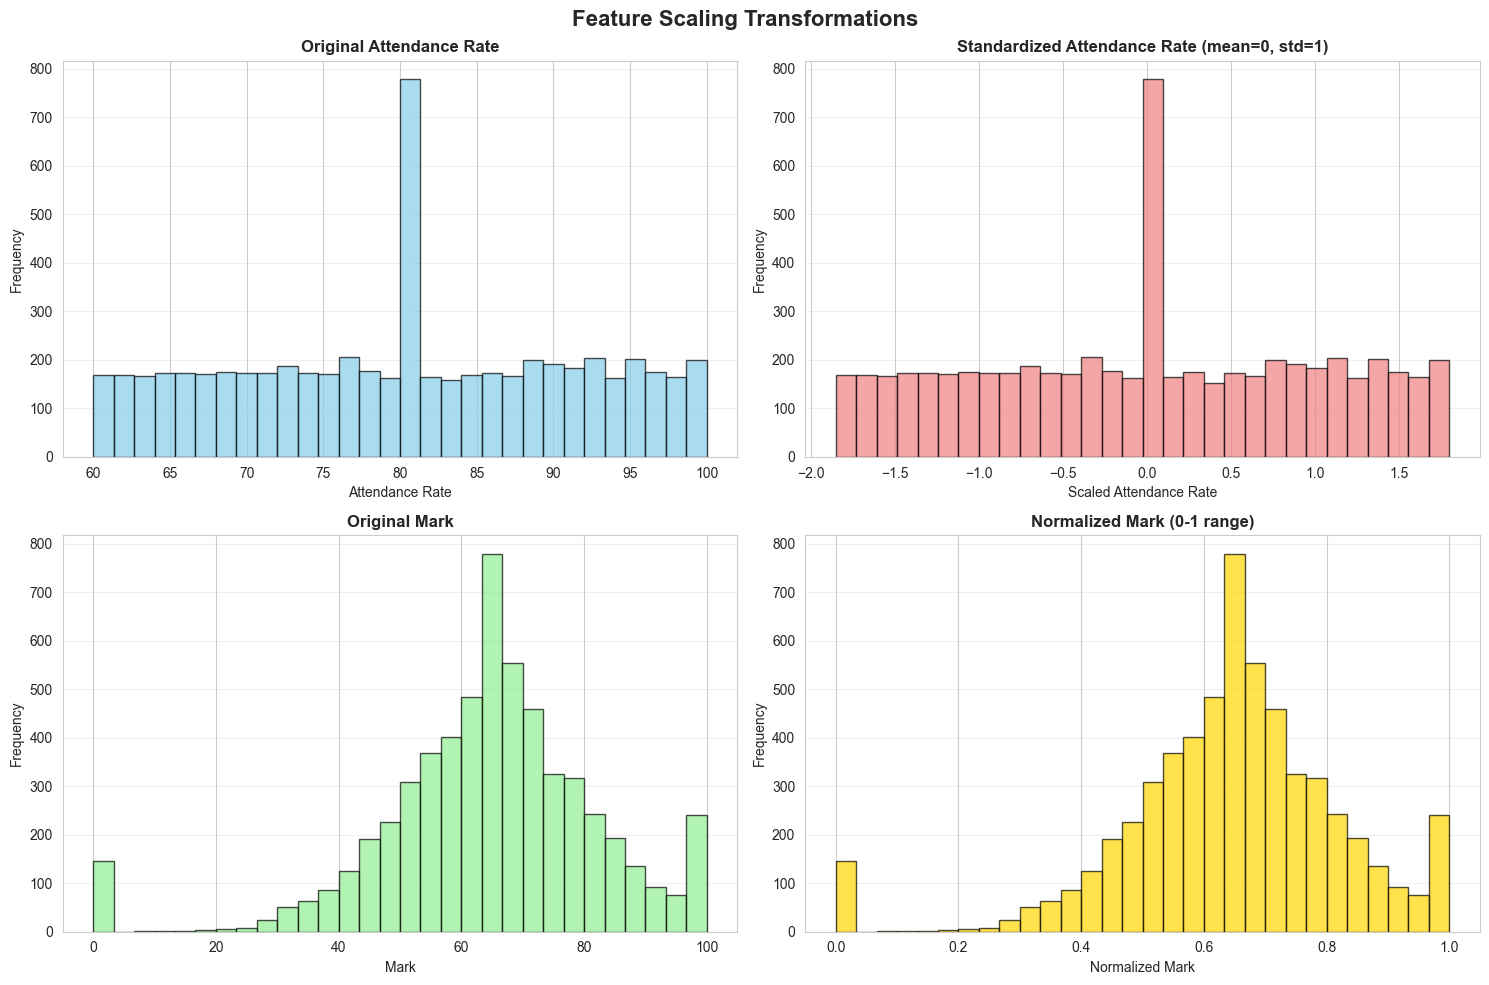


✓ Saved: outputs/03_scaling_transformations.png


In [8]:
# Visualize scaling transformations
if 'Attendance_Rate_Scaled' in assessments_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Feature Scaling Transformations', fontsize=16, fontweight='bold')
    
    # Original Attendance Rate
    axes[0, 0].hist(assessments_df['Attendance_Rate'].dropna(), bins=30, 
                    color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Original Attendance Rate', fontweight='bold')
    axes[0, 0].set_xlabel('Attendance Rate')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Scaled Attendance Rate
    axes[0, 1].hist(assessments_df['Attendance_Rate_Scaled'].dropna(), bins=30,
                    color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Standardized Attendance Rate (mean=0, std=1)', fontweight='bold')
    axes[0, 1].set_xlabel('Scaled Attendance Rate')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Original Mark
    axes[1, 0].hist(assessments_df['Mark'].dropna(), bins=30,
                    color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Original Mark', fontweight='bold')
    axes[1, 0].set_xlabel('Mark')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Normalized Mark
    axes[1, 1].hist(assessments_df['Mark_Normalized'].dropna(), bins=30,
                    color='gold', edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('Normalized Mark (0-1 range)', fontweight='bold')
    axes[1, 1].set_xlabel('Normalized Mark')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/03_scaling_transformations.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Saved: outputs/03_scaling_transformations.png")

---
## 2. ENCODING (CATEGORICAL VARIABLES)

### 2.1 Identify Categorical Variables

In [9]:
print("\n" + "="*60)
print("2. ENCODING CATEGORICAL VARIABLES")
print("="*60)

print("\nCategorical variables to encode:")
print("  - Campus_Name (Students, Courses, Assessments)")
print("  - Program (Students, Courses)")
print("  - Assessment_Type (Assessments)")
print("  - Gender (Students)")

# Check unique values
print("\n--- Current Categorical Values ---")
print(f"\nCampus_Name: {students_df['Campus_Name'].unique()}")
print(f"Program: {students_df['Program'].unique()}")
print(f"Gender: {students_df['Gender'].unique()}")
print(f"Assessment_Type: {assessments_df['Assessment_Type'].unique()}")


2. ENCODING CATEGORICAL VARIABLES

Categorical variables to encode:
  - Campus_Name (Students, Courses, Assessments)
  - Program (Students, Courses)
  - Assessment_Type (Assessments)
  - Gender (Students)

--- Current Categorical Values ---

Campus_Name: <StringArray>
['Huye', 'Kigali', 'Musanze']
Length: 3, dtype: str
Program: <StringArray>
['Business Administration', 'Tourism And Hospitality',
       'Civil Engineering',  'Electrical Engineering',
            'Architecture',  'Information Technology']
Length: 6, dtype: str
Gender: <StringArray>
['MALE', 'FEMALE', nan]
Length: 3, dtype: str
Assessment_Type: <StringArray>
['Quiz', 'Assignment', 'CAT', 'Project', 'Exam']
Length: 5, dtype: str


### 2.2 One-Hot Encode Students Dataset

In [10]:
print("\n--- Encoding Students Dataset ---")

# Store original shape
students_shape_before = students_df.shape
students_cols_before = students_df.columns.tolist()

# One-hot encode Campus_Name and Program
students_df = pd.get_dummies(
    students_df, 
    columns=['Campus_Name', 'Program', 'Gender'],
    prefix=['Campus', 'Prog', 'Gender'],
    drop_first=False  # Keep all categories for clarity
)

students_shape_after = students_df.shape
new_cols = [col for col in students_df.columns if col not in students_cols_before]

print(f"✓ Students dataset shape: {students_shape_before} → {students_shape_after}")
print(f"✓ Added {len(new_cols)} encoded columns")
print(f"\nNew encoded columns:")
for col in sorted(new_cols):
    print(f"  - {col}")

# Show sample
print("\nSample encoded data:")
encoded_cols = [col for col in students_df.columns if col.startswith(('Campus_', 'Prog_', 'Gender_'))]
students_df[['Student_ID'] + encoded_cols[:8]].head()


--- Encoding Students Dataset ---
✓ Students dataset shape: (589, 15) → (589, 23)
✓ Added 11 encoded columns

New encoded columns:
  - Campus_Huye
  - Campus_Kigali
  - Campus_Musanze
  - Gender_FEMALE
  - Gender_MALE
  - Prog_Architecture
  - Prog_Business Administration
  - Prog_Civil Engineering
  - Prog_Electrical Engineering
  - Prog_Information Technology
  - Prog_Tourism And Hospitality

Sample encoded data:


,Student_ID,Campus_ID,Campus_Huye,Campus_Kigali,Campus_Musanze,Prog_Architecture,Prog_Business Administration,Prog_Civil Engineering,Prog_Electrical Engineering
0,RPH0001,1,True,False,False,False,True,False,False
1,RPH0144,1,True,False,False,False,True,False,False
2,RPH0145,1,True,False,False,False,False,False,False
3,RPH0146,1,True,False,False,False,False,True,False
4,RPH0147,1,True,False,False,False,False,False,True


### 2.3 One-Hot Encode Courses Dataset

In [11]:
print("\n--- Encoding Courses Dataset ---")

courses_shape_before = courses_df.shape
courses_cols_before = courses_df.columns.tolist()

# One-hot encode Campus_Name and Program
courses_df = pd.get_dummies(
    courses_df,
    columns=['Campus_Name', 'Program'],
    prefix=['Campus', 'Prog'],
    drop_first=False
)

courses_shape_after = courses_df.shape
new_cols = [col for col in courses_df.columns if col not in courses_cols_before]

print(f"✓ Courses dataset shape: {courses_shape_before} → {courses_shape_after}")
print(f"✓ Added {len(new_cols)} encoded columns")
print(f"\nNew encoded columns:")
for col in sorted(new_cols):
    print(f"  - {col}")


--- Encoding Courses Dataset ---
✓ Courses dataset shape: (75, 10) → (75, 17)
✓ Added 9 encoded columns

New encoded columns:
  - Campus_Huye
  - Campus_Kigali
  - Campus_Musanze
  - Prog_Architecture
  - Prog_Business Administration
  - Prog_Civil Engineering
  - Prog_Electrical Engineering
  - Prog_Information Technology
  - Prog_Tourism And Hospitality


### 2.4 One-Hot Encode Assessments Dataset

In [12]:
print("\n--- Encoding Assessments Dataset ---")

assessments_shape_before = assessments_df.shape
assessments_cols_before = assessments_df.columns.tolist()

# One-hot encode Campus_Name and Assessment_Type
assessments_df = pd.get_dummies(
    assessments_df,
    columns=['Campus_Name', 'Assessment_Type'],
    prefix=['Campus', 'Assess'],
    drop_first=False
)

assessments_shape_after = assessments_df.shape
new_cols = [col for col in assessments_df.columns if col not in assessments_cols_before]

print(f"✓ Assessments dataset shape: {assessments_shape_before} → {assessments_shape_after}")
print(f"✓ Added {len(new_cols)} encoded columns")
print(f"\nNew encoded columns:")
for col in sorted(new_cols):
    print(f"  - {col}")

# Show sample
print("\nSample encoded data:")
encoded_cols = [col for col in assessments_df.columns if col.startswith(('Campus_', 'Assess_'))]
assessments_df[['Student_ID', 'Course_Code'] + encoded_cols[:6]].head()


--- Encoding Assessments Dataset ---
✓ Assessments dataset shape: (5905, 14) → (5905, 20)
✓ Added 8 encoded columns

New encoded columns:
  - Assess_Assignment
  - Assess_CAT
  - Assess_Exam
  - Assess_Project
  - Assess_Quiz
  - Campus_Huye
  - Campus_Kigali
  - Campus_Musanze

Sample encoded data:


,Student_ID,Course_Code,Campus_ID,Campus_Huye,Campus_Kigali,Campus_Musanze,Assess_Assignment,Assess_CAT
0,RPH0001,BA103,1,True,False,False,False,False
1,RPH0150,EE101,1,True,False,False,False,False
2,RPH0150,EE101,1,True,False,False,False,False
3,RPH0150,EE102,1,True,False,False,False,False
4,RPH0150,EE102,1,True,False,False,False,False


### 2.5 Visualize Encoding Results

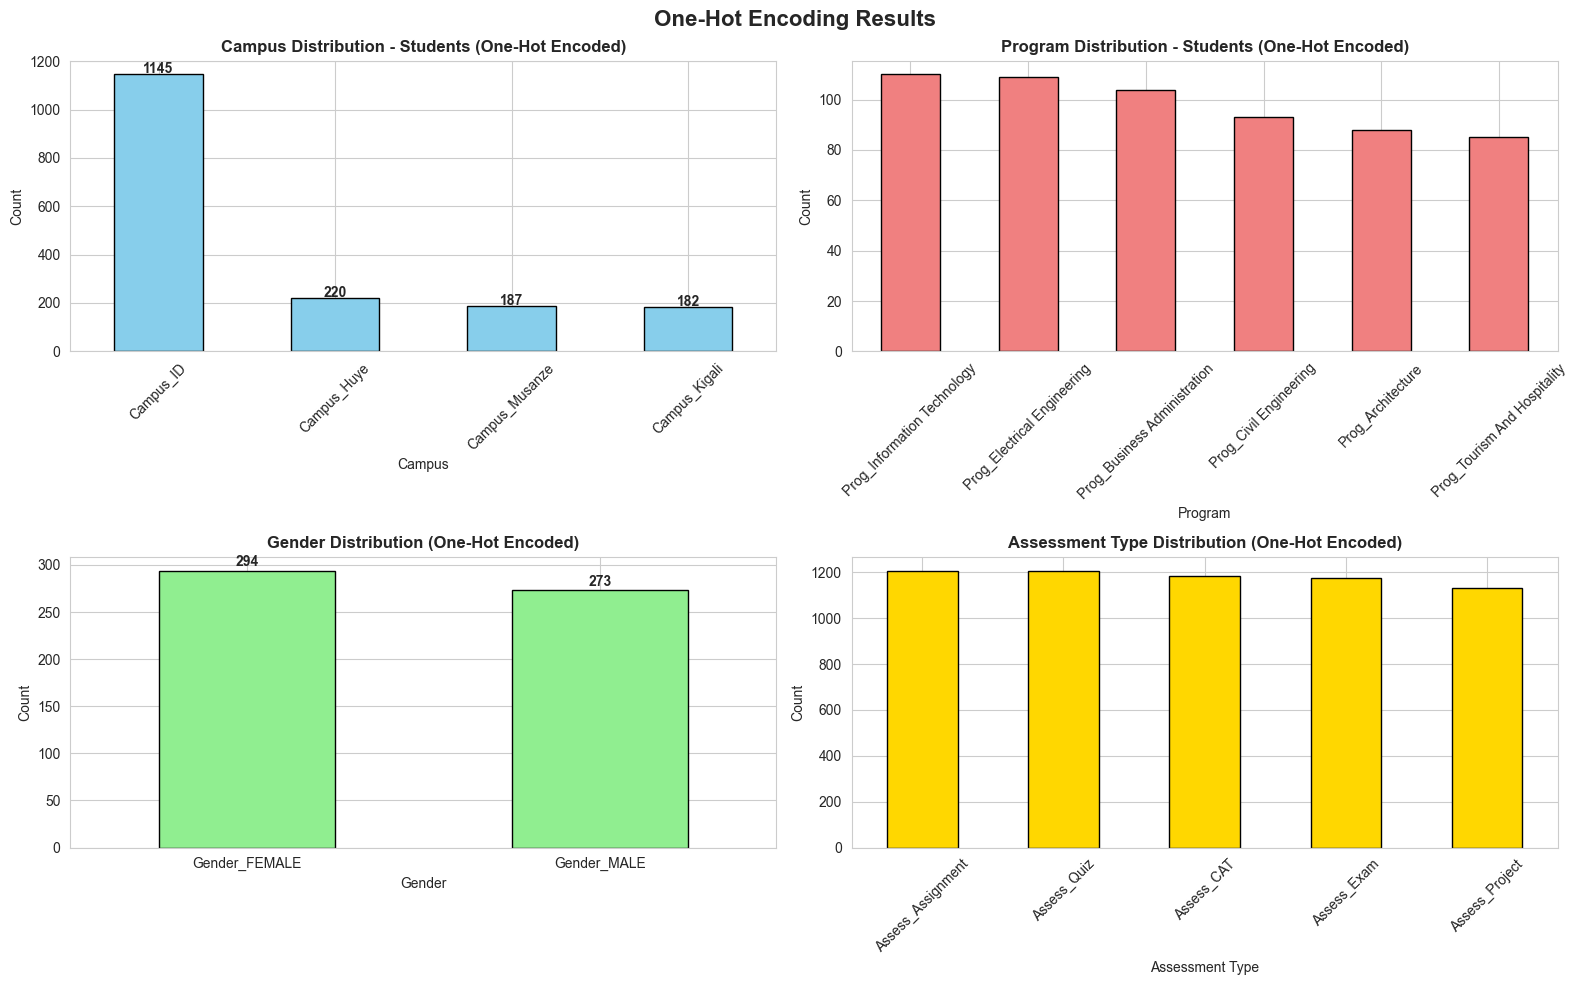


✓ Saved: outputs/03_encoding_results.png


In [13]:
# Visualize encoding effects
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('One-Hot Encoding Results', fontsize=16, fontweight='bold')

# Campus distribution in Students
campus_cols_students = [col for col in students_df.columns if col.startswith('Campus_')]
if campus_cols_students:
    campus_data = students_df[campus_cols_students].sum().sort_values(ascending=False)
    campus_data.plot(kind='bar', ax=axes[0, 0], color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Campus Distribution - Students (One-Hot Encoded)', fontweight='bold')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_xlabel('Campus')
    axes[0, 0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(campus_data.values):
        axes[0, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Program distribution in Students
prog_cols_students = [col for col in students_df.columns if col.startswith('Prog_')]
if prog_cols_students:
    prog_data = students_df[prog_cols_students].sum().sort_values(ascending=False)
    prog_data.plot(kind='bar', ax=axes[0, 1], color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Program Distribution - Students (One-Hot Encoded)', fontweight='bold')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_xlabel('Program')
    axes[0, 1].tick_params(axis='x', rotation=45)

# Gender distribution
gender_cols = [col for col in students_df.columns if col.startswith('Gender_')]
if gender_cols:
    gender_data = students_df[gender_cols].sum().sort_values(ascending=False)
    gender_data.plot(kind='bar', ax=axes[1, 0], color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Gender Distribution (One-Hot Encoded)', fontweight='bold')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_xlabel('Gender')
    axes[1, 0].tick_params(axis='x', rotation=0)
    for i, v in enumerate(gender_data.values):
        axes[1, 0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Assessment Type distribution
assess_cols = [col for col in assessments_df.columns if col.startswith('Assess_')]
if assess_cols:
    assess_data = assessments_df[assess_cols].sum().sort_values(ascending=False)
    assess_data.plot(kind='bar', ax=axes[1, 1], color='gold', edgecolor='black')
    axes[1, 1].set_title('Assessment Type Distribution (One-Hot Encoded)', fontweight='bold')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_xlabel('Assessment Type')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('outputs/03_encoding_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/03_encoding_results.png")

---
## 3. BINNING (DISCRETIZATION)

### 3.1 Create Performance Bands from Marks

In [14]:
print("\n" + "="*60)
print("3. BINNING (DISCRETIZATION)")
print("="*60)

print("\n--- Creating Performance Bands ---")

# Define bins and labels based on Rwanda Polytechnic grading system
bins = [0, 40, 50, 70, 100]
labels = ['Fail', 'Pass', 'Credit', 'Distinction']

print(f"\nBin edges: {bins}")
print(f"Labels: {labels}")
print("\nBinning logic:")
print("  0-40:  Fail")
print("  40-50: Pass")
print("  50-70: Credit")
print("  70-100: Distinction")

# Create performance bands
assessments_df['Performance_Band'] = pd.cut(
    assessments_df['Mark'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print(f"\n✓ Created Performance_Band column")
print(f"\nPerformance Band Distribution:")
print(assessments_df['Performance_Band'].value_counts().sort_index())

# Show percentages
print(f"\nPerformance Band Percentages:")
band_pct = (assessments_df['Performance_Band'].value_counts(normalize=True) * 100).sort_index()
for band, pct in band_pct.items():
    print(f"  {band}: {pct:.2f}%")


3. BINNING (DISCRETIZATION)

--- Creating Performance Bands ---

Bin edges: [0, 40, 50, 70, 100]
Labels: ['Fail', 'Pass', 'Credit', 'Distinction']

Binning logic:
  0-40:  Fail
  40-50: Pass
  50-70: Credit
  70-100: Distinction

✓ Created Performance_Band column

Performance Band Distribution:
Performance_Band
Fail            392
Pass            550
Credit         2891
Distinction    2072
Name: count, dtype: int64

Performance Band Percentages:
  Fail: 6.64%
  Pass: 9.31%
  Credit: 48.96%
  Distinction: 35.09%


In [15]:
# Show sample data with performance bands
print("\nSample data with Performance Bands:")
sample_data = assessments_df[['Student_ID', 'Course_Code', 'Mark', 'Performance_Band']].head(20)
sample_data


Sample data with Performance Bands:


,Student_ID,Course_Code,Mark,Performance_Band
0,RPH0001,BA103,63.10,Credit
1,RPH0150,EE101,57.90,Credit
2,RPH0150,EE101,65.10,Credit
3,RPH0150,EE102,66.85,Credit
4,RPH0150,EE102,64.30,Credit
5,RPH0150,EE102,100.00,Distinction
6,RPH0150,EE103,58.10,Credit
7,RPH0150,EE103,93.40,Distinction
8,RPH0150,EE201,84.10,Distinction
9,RPH0150,EE201,40.60,Pass


### 3.2 Create Attendance Bands

In [16]:
print("\n--- Creating Attendance Bands ---")

if 'Attendance_Rate' in assessments_df.columns:
    # Define attendance bands
    attendance_bins = [0, 50, 75, 85, 100]
    attendance_labels = ['Poor', 'Fair', 'Good', 'Excellent']
    
    print(f"\nBin edges: {attendance_bins}")
    print(f"Labels: {attendance_labels}")
    print("\nBinning logic:")
    print("  0-50:   Poor")
    print("  50-75:  Fair")
    print("  75-85:  Good")
    print("  85-100: Excellent")
    
    assessments_df['Attendance_Band'] = pd.cut(
        assessments_df['Attendance_Rate'],
        bins=attendance_bins,
        labels=attendance_labels,
        include_lowest=True
    )
    
    print(f"\n✓ Created Attendance_Band column")
    print(f"\nAttendance Band Distribution:")
    print(assessments_df['Attendance_Band'].value_counts().sort_index())
    
    # Show percentages
    print(f"\nAttendance Band Percentages:")
    attend_pct = (assessments_df['Attendance_Band'].value_counts(normalize=True) * 100).sort_index()
    for band, pct in attend_pct.items():
        print(f"  {band}: {pct:.2f}%")
else:
    print("⚠ Attendance_Rate column not found")


--- Creating Attendance Bands ---

Bin edges: [0, 50, 75, 85, 100]
Labels: ['Poor', 'Fair', 'Good', 'Excellent']

Binning logic:
  0-50:   Poor
  50-75:  Fair
  75-85:  Good
  85-100: Excellent

✓ Created Attendance_Band column

Attendance Band Distribution:
Attendance_Band
Poor            0
Fair         1953
Good         1897
Excellent    2055
Name: count, dtype: int64

Attendance Band Percentages:
  Poor: 0.00%
  Fair: 33.07%
  Good: 32.13%
  Excellent: 34.80%


### 3.3 Create Age Groups from DOB

In [17]:
print("\n--- Creating Age Groups ---")

# Convert DOB to datetime if not already
students_df['DOB'] = pd.to_datetime(students_df['DOB'], errors='coerce')

# Calculate age
current_year = datetime.now().year
students_df['Age'] = current_year - students_df['DOB'].dt.year

# Create age groups
age_bins = [0, 20, 23, 26, 100]
age_labels = ['18-20', '21-23', '24-26', '27+']

print(f"\nBin edges: {age_bins}")
print(f"Labels: {age_labels}")

students_df['Age_Group'] = pd.cut(
    students_df['Age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True
)

print(f"\n✓ Created Age_Group column")
print(f"\nAge Group Distribution:")
print(students_df['Age_Group'].value_counts().sort_index())

# Show percentages
print(f"\nAge Group Percentages:")
age_pct = (students_df['Age_Group'].value_counts(normalize=True) * 100).sort_index()
for group, pct in age_pct.items():
    print(f"  {group}: {pct:.2f}%")


--- Creating Age Groups ---

Bin edges: [0, 20, 23, 26, 100]
Labels: ['18-20', '21-23', '24-26', '27+']

✓ Created Age_Group column

Age Group Distribution:
Age_Group
18-20      0
21-23    169
24-26    211
27+      117
Name: count, dtype: int64

Age Group Percentages:
  18-20: 0.00%
  21-23: 34.00%
  24-26: 42.45%
  27+: 23.54%


### 3.4 Visualize Binning Results

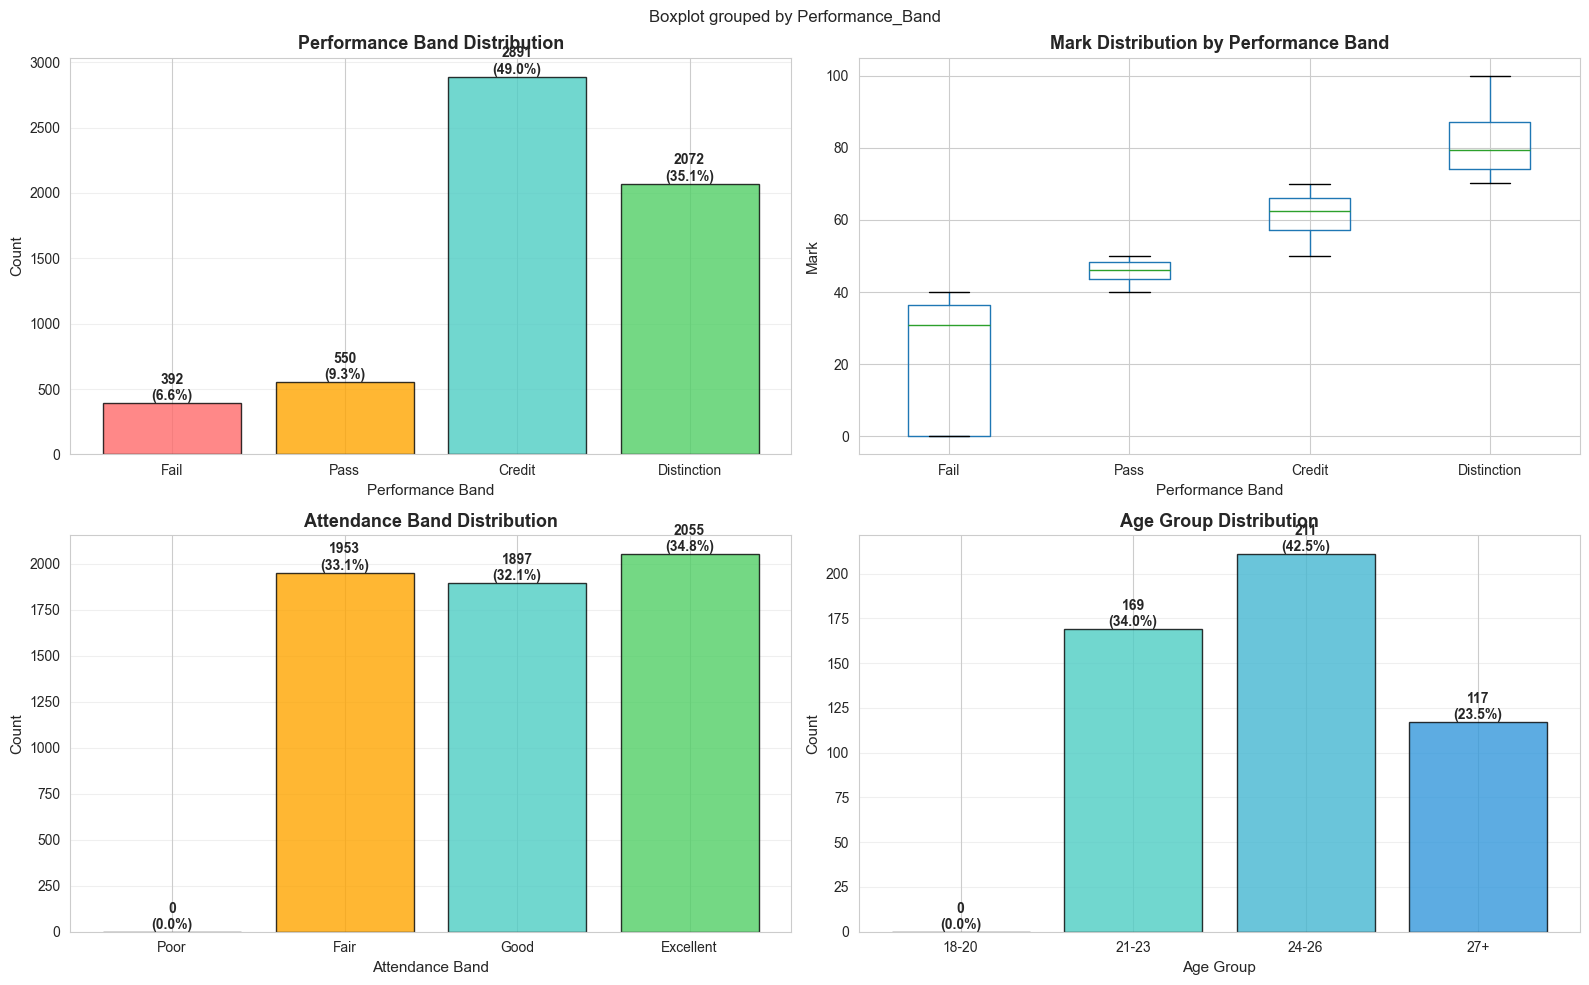


✓ Saved: outputs/03_binning_results.png


In [18]:
# Visualize binning results
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Binning (Discretization) Results', fontsize=16, fontweight='bold')

# Performance Bands
perf_counts = assessments_df['Performance_Band'].value_counts().sort_index()
colors_perf = ['#FF6B6B', '#FFA500', '#4ECDC4', '#51CF66']
bars1 = axes[0, 0].bar(range(len(perf_counts)), perf_counts.values, 
                       color=colors_perf, edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Performance Band Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].set_xlabel('Performance Band', fontsize=11)
axes[0, 0].set_xticks(range(len(perf_counts)))
axes[0, 0].set_xticklabels(perf_counts.index, rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars1, perf_counts.values)):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{val}\n({val/len(assessments_df)*100:.1f}%)',
                    ha='center', va='bottom', fontweight='bold')

# Mark vs Performance Band (Box plot)
assessments_df.boxplot(column='Mark', by='Performance_Band', ax=axes[0, 1])
axes[0, 1].set_title('Mark Distribution by Performance Band', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('Mark', fontsize=11)
axes[0, 1].set_xlabel('Performance Band', fontsize=11)
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Attendance Bands (if exists)
if 'Attendance_Band' in assessments_df.columns:
    attend_counts = assessments_df['Attendance_Band'].value_counts().sort_index()
    colors_attend = ['#FF6B6B', '#FFA500', '#4ECDC4', '#51CF66']
    bars2 = axes[1, 0].bar(range(len(attend_counts)), attend_counts.values,
                           color=colors_attend, edgecolor='black', alpha=0.8)
    axes[1, 0].set_title('Attendance Band Distribution', fontsize=13, fontweight='bold')
    axes[1, 0].set_ylabel('Count', fontsize=11)
    axes[1, 0].set_xlabel('Attendance Band', fontsize=11)
    axes[1, 0].set_xticks(range(len(attend_counts)))
    axes[1, 0].set_xticklabels(attend_counts.index, rotation=0)
    axes[1, 0].grid(axis='y', alpha=0.3)
    for i, (bar, val) in enumerate(zip(bars2, attend_counts.values)):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                        f'{val}\n({val/assessments_df["Attendance_Band"].notna().sum()*100:.1f}%)',
                        ha='center', va='bottom', fontweight='bold')

# Age Groups
if 'Age_Group' in students_df.columns:
    age_counts = students_df['Age_Group'].value_counts().sort_index()
    colors_age = ['#95E1D3', '#4ECDC4', '#45B7D1', '#3498DB']
    bars3 = axes[1, 1].bar(range(len(age_counts)), age_counts.values,
                           color=colors_age, edgecolor='black', alpha=0.8)
    axes[1, 1].set_title('Age Group Distribution', fontsize=13, fontweight='bold')
    axes[1, 1].set_ylabel('Count', fontsize=11)
    axes[1, 1].set_xlabel('Age Group', fontsize=11)
    axes[1, 1].set_xticks(range(len(age_counts)))
    axes[1, 1].set_xticklabels(age_counts.index, rotation=0)
    axes[1, 1].grid(axis='y', alpha=0.3)
    for i, (bar, val) in enumerate(zip(bars3, age_counts.values)):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                        f'{val}\n({val/students_df["Age_Group"].notna().sum()*100:.1f}%)',
                        ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/03_binning_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/03_binning_results.png")

---
## 4. TRANSFORMATION SUMMARY

In [19]:
print("\n" + "="*60)
print("4. TRANSFORMATION SUMMARY")
print("="*60)

# Create summary report
summary_data = []

# Scaling
summary_data.append(['Scaling', 'Attendance_Rate', 'StandardScaler (mean=0, std=1)', 'Attendance_Rate_Scaled'])
summary_data.append(['Scaling', 'Mark', 'MinMaxScaler (0-1 range)', 'Mark_Normalized'])

# Encoding - Students
campus_encoded = [col for col in students_df.columns if col.startswith('Campus_')]
prog_encoded = [col for col in students_df.columns if col.startswith('Prog_')]
gender_encoded = [col for col in students_df.columns if col.startswith('Gender_')]

summary_data.append(['Encoding (Students)', 'Campus_Name', 'One-Hot Encoding', f'{len(campus_encoded)} columns'])
summary_data.append(['Encoding (Students)', 'Program', 'One-Hot Encoding', f'{len(prog_encoded)} columns'])
summary_data.append(['Encoding (Students)', 'Gender', 'One-Hot Encoding', f'{len(gender_encoded)} columns'])

# Encoding - Assessments
assess_encoded = [col for col in assessments_df.columns if col.startswith('Assess_')]
summary_data.append(['Encoding (Assessments)', 'Assessment_Type', 'One-Hot Encoding', f'{len(assess_encoded)} columns'])

# Binning
summary_data.append(['Binning', 'Mark', '4 bins (0-40-50-70-100)', 'Performance_Band'])
if 'Attendance_Band' in assessments_df.columns:
    summary_data.append(['Binning', 'Attendance_Rate', '4 bins (0-50-75-85-100)', 'Attendance_Band'])
if 'Age_Group' in students_df.columns:
    summary_data.append(['Binning', 'Age', '4 bins (0-20-23-26-100)', 'Age_Group'])

# Create DataFrame
summary_df = pd.DataFrame(summary_data, 
                         columns=['Transformation Type', 'Original Feature', 'Method', 'Result'])

print("\n" + summary_df.to_string(index=False))

# Save summary
summary_df.to_csv('outputs/03_transformation_summary.csv', index=False)
print("\n✓ Saved: outputs/03_transformation_summary.csv")


4. TRANSFORMATION SUMMARY

   Transformation Type Original Feature                         Method                 Result
               Scaling  Attendance_Rate StandardScaler (mean=0, std=1) Attendance_Rate_Scaled
               Scaling             Mark       MinMaxScaler (0-1 range)        Mark_Normalized
   Encoding (Students)      Campus_Name               One-Hot Encoding              4 columns
   Encoding (Students)          Program               One-Hot Encoding              6 columns
   Encoding (Students)           Gender               One-Hot Encoding              2 columns
Encoding (Assessments)  Assessment_Type               One-Hot Encoding              5 columns
               Binning             Mark        4 bins (0-40-50-70-100)       Performance_Band
               Binning  Attendance_Rate        4 bins (0-50-75-85-100)        Attendance_Band
               Binning              Age        4 bins (0-20-23-26-100)              Age_Group

✓ Saved: outputs/03_transformat

---
## 5. SAVE TRANSFORMED DATASETS

In [20]:
print("\n" + "="*60)
print("5. SAVING TRANSFORMED DATASETS")
print("="*60)

# Save transformed datasets as "silver" layer
students_df.to_csv('outputs/silver_students_transformed.csv', index=False)
print("✓ Saved: outputs/silver_students_transformed.csv")
print(f"  Shape: {students_df.shape}")
print(f"  Columns: {len(students_df.columns)}")

courses_df.to_csv('outputs/silver_courses_transformed.csv', index=False)
print("\n✓ Saved: outputs/silver_courses_transformed.csv")
print(f"  Shape: {courses_df.shape}")
print(f"  Columns: {len(courses_df.columns)}")

assessments_df.to_csv('outputs/silver_assessments_transformed.csv', index=False)
print("\n✓ Saved: outputs/silver_assessments_transformed.csv")
print(f"  Shape: {assessments_df.shape}")
print(f"  Columns: {len(assessments_df.columns)}")


5. SAVING TRANSFORMED DATASETS
✓ Saved: outputs/silver_students_transformed.csv
  Shape: (589, 25)
  Columns: 25

✓ Saved: outputs/silver_courses_transformed.csv
  Shape: (75, 17)
  Columns: 17

✓ Saved: outputs/silver_assessments_transformed.csv
  Shape: (5905, 22)
  Columns: 22


---
## 6. GENERATE DETAILED REPORT

In [21]:
# Generate comprehensive text report
with open('outputs/03_transformation_report.txt', 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write("DATA TRANSFORMATION SUMMARY REPORT\n")
    f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write("="*70 + "\n\n")
    
    f.write("TRANSFORMATION OPERATIONS PERFORMED:\n")
    f.write("-"*70 + "\n\n")
    
    f.write("1. SCALING & STANDARDIZATION\n")
    f.write("   " + "-"*60 + "\n")
    f.write("   - Attendance_Rate → Attendance_Rate_Scaled (StandardScaler)\n")
    f.write("     Mean: 0, Std: 1\n")
    f.write("   - Mark → Mark_Normalized (MinMaxScaler)\n")
    f.write("     Range: 0-1\n\n")
    
    f.write("2. ONE-HOT ENCODING\n")
    f.write("   " + "-"*60 + "\n")
    f.write(f"   Students Dataset:\n")
    f.write(f"     - Campus_Name → {len(campus_encoded)} binary columns\n")
    f.write(f"     - Program → {len(prog_encoded)} binary columns\n")
    f.write(f"     - Gender → {len(gender_encoded)} binary columns\n")
    f.write(f"   Assessments Dataset:\n")
    f.write(f"     - Assessment_Type → {len(assess_encoded)} binary columns\n\n")
    
    f.write("3. BINNING (DISCRETIZATION)\n")
    f.write("   " + "-"*60 + "\n")
    f.write("   Performance Bands (from Mark):\n")
    f.write("     - Fail:        0-40\n")
    f.write("     - Pass:        40-50\n")
    f.write("     - Credit:      50-70\n")
    f.write("     - Distinction: 70-100\n\n")
    
    if 'Attendance_Band' in assessments_df.columns:
        f.write("   Attendance Bands (from Attendance_Rate):\n")
        f.write("     - Poor:      0-50\n")
        f.write("     - Fair:      50-75\n")
        f.write("     - Good:      75-85\n")
        f.write("     - Excellent: 85-100\n\n")
    
    if 'Age_Group' in students_df.columns:
        f.write("   Age Groups (from DOB):\n")
        f.write("     - 18-20\n")
        f.write("     - 21-23\n")
        f.write("     - 24-26\n")
        f.write("     - 27+\n\n")
    
    f.write("\n" + "="*70 + "\n")
    f.write("DATASET SIZES AFTER TRANSFORMATION\n")
    f.write("="*70 + "\n")
    f.write(f"Students:    {students_df.shape[0]:6} rows × {students_df.shape[1]:3} columns\n")
    f.write(f"Courses:     {courses_df.shape[0]:6} rows × {courses_df.shape[1]:3} columns\n")
    f.write(f"Assessments: {assessments_df.shape[0]:6} rows × {assessments_df.shape[1]:3} columns\n")
    
    f.write("\n" + "="*70 + "\n")
    f.write("PERFORMANCE BAND DISTRIBUTION\n")
    f.write("="*70 + "\n")
    perf_dist = assessments_df['Performance_Band'].value_counts().sort_index()
    for band, count in perf_dist.items():
        pct = (count / len(assessments_df)) * 100
        f.write(f"{band:12} : {count:6} ({pct:5.2f}%)\n")

print("\n✓ Saved: outputs/03_transformation_report.txt")


✓ Saved: outputs/03_transformation_report.txt


---
## PHASE 3 COMPLETE! ✅

### Deliverables Created:
1. **Transformed Datasets (Silver Layer):**
   - `outputs/silver_students_transformed.csv`
   - `outputs/silver_courses_transformed.csv`
   - `outputs/silver_assessments_transformed.csv`

2. **Reports:**
   - `outputs/03_transformation_summary.csv`
   - `outputs/03_transformation_report.txt`

3. **Visualizations:**
   - `outputs/03_scaling_transformations.png`
   - `outputs/03_encoding_results.png`
   - `outputs/03_binning_results.png`

### Transformations Applied:
✅ **Scaling:** Attendance_Rate, Mark

✅ **Encoding:** Campus_Name, Program, Gender, Assessment_Type

✅ **Binning:** Performance_Band, Attendance_Band, Age_Group

### Next Step:
Run **Phase 4: Integration** (`04_integration.ipynb`)

In [22]:
print("\n" + "="*60)
print("PHASE 3 COMPLETE!")
print("="*60)
print("\nTransformations applied:")
print("  ✓ Scaling (2 features)")
print(f"  ✓ Encoding ({len(campus_encoded) + len(prog_encoded) + len(gender_encoded) + len(assess_encoded)} binary columns created)")
print("  ✓ Binning (3 categorical features created)")
print("\nNext step: Run 04_integration.ipynb")
print("\nAll transformed datasets and reports saved to outputs/ folder")


PHASE 3 COMPLETE!

Transformations applied:
  ✓ Scaling (2 features)
  ✓ Encoding (17 binary columns created)
  ✓ Binning (3 categorical features created)

Next step: Run 04_integration.ipynb

All transformed datasets and reports saved to outputs/ folder
